In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

2023-10-04 19:26:34.110651: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-10-04 19:26:36.928862: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 19:26:36.931432: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-10-04 19:26:37.377635: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-04 19:26:37.380345: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 3

True

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
X_train, y_train, X_test, y_test = C.Helper.split_patients(images, labels)

In [7]:
X_train, y_train, X_test, y_test = C.Helper.normalization(DATAPATH, X_train, y_train, X_test, y_test)

In [8]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key(y_train)

In [9]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13533, 512, 512, 1) (13533, 512, 512, 1) (3233, 512, 512, 1) (3233, 512, 512, 1)


In [10]:
X_train, y_train = C.Helper.filter_slices(X_train, y_train)

(627, 512, 512, 1) (627, 512, 512, 1)


In [11]:
X_train_set = X_train[:last_key]
y_train_set = y_train[:last_key]
X_val = X_train[last_key:]
y_val = y_train[last_key:]

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


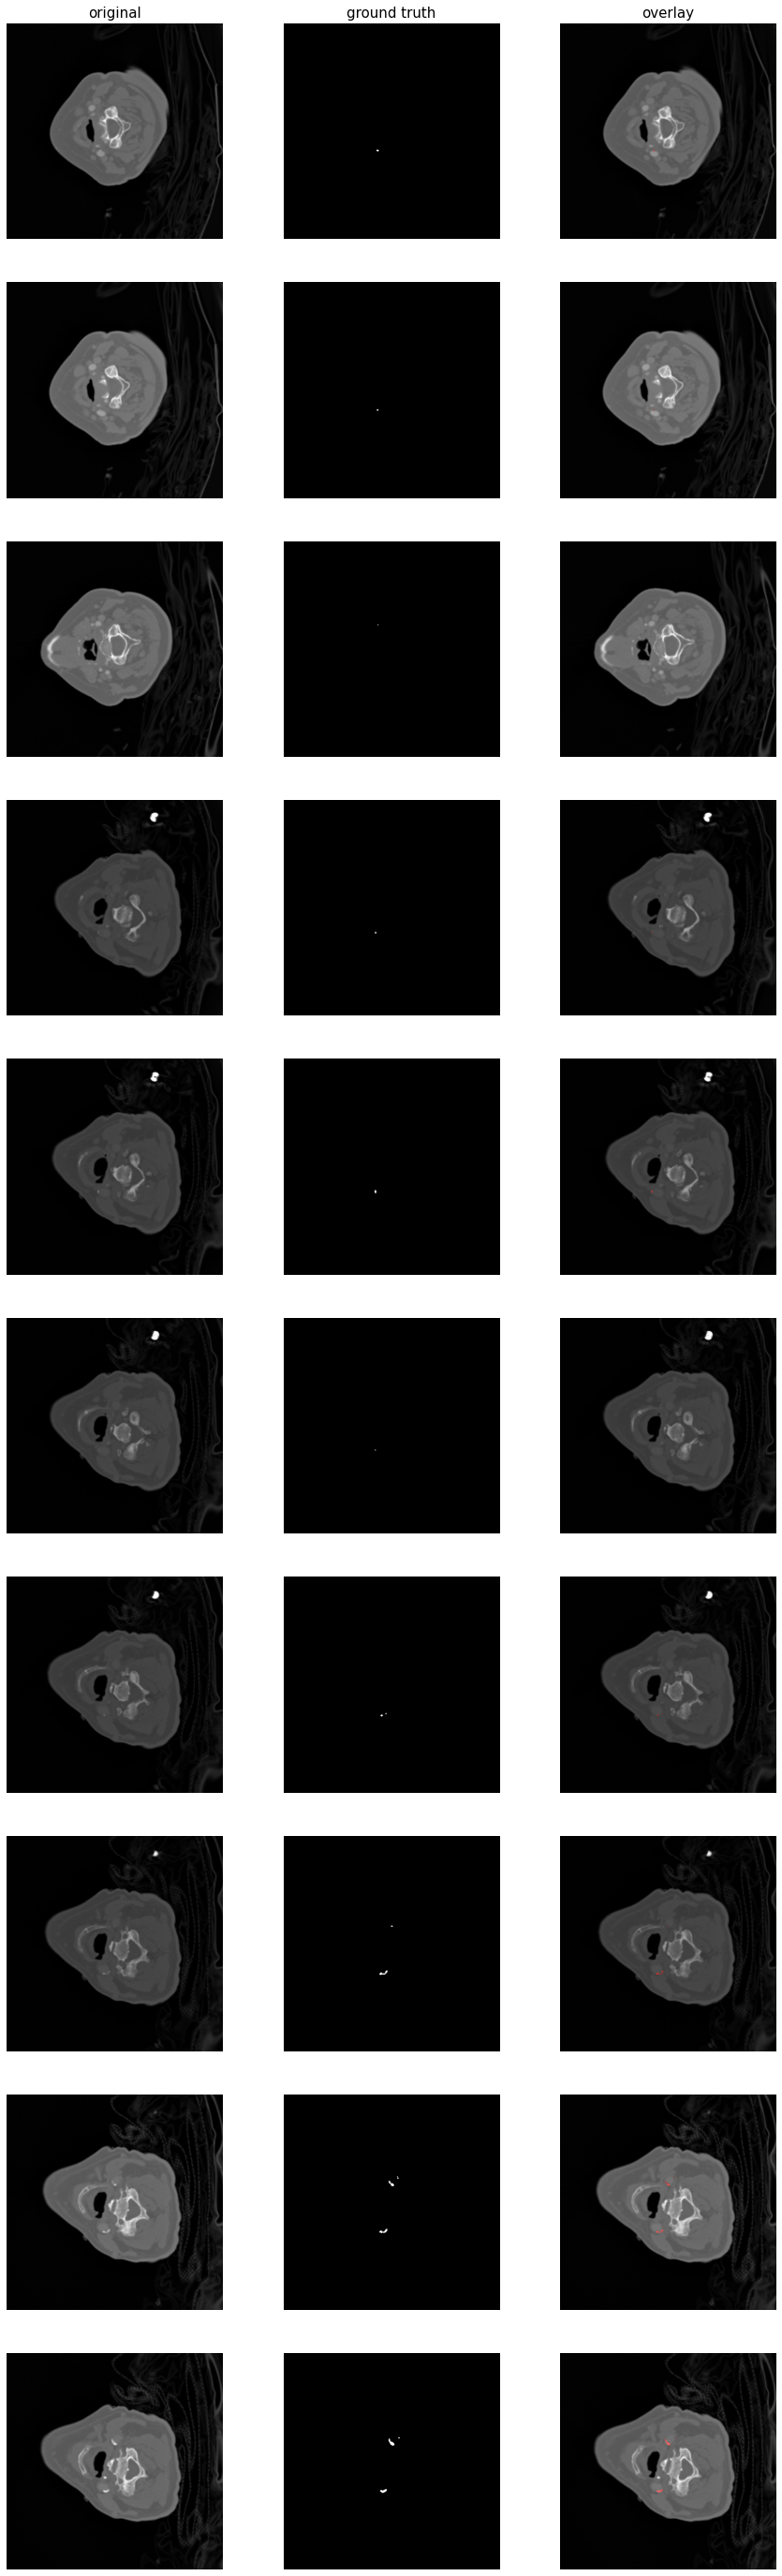

In [12]:
from keras_unet.utils import plot_imgs
plot_imgs(org_imgs=X_train_set, mask_imgs=y_train_set, nm_img_to_plot=10, figsize=5)

In [13]:
train_gen = C.Helper.augment(X_train_set, y_train_set)

In [14]:
model = C.Helper.create_unet(X_train_set[0].shape)

2023-10-04 19:29:13.558020: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-04 19:29:13.560930: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-04 19:29:13.570557: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2023-10-04 19:29:13.573452: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-04 19:29:13.575870: I tensorflow/core

In [15]:
model, history = C.Helper.train_unet(train_gen, X_train_set, y_train_set, X_val, y_val, model, epochs=200)

2023-10-04 19:29:14.764019: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-10-04 19:29:14.784752: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/200


2023-10-04 19:29:15.982180: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-10-04 19:29:16.807776: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-10-04 19:29:17.871126: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-10-04 19:29:17.871150: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-10-04 19:29:17.871504: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-10-04 19:29:18.920159: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-10-04 19:29:19.983185: I tensorflow/stream_exec

16/16 [==============================] - 160s 6s/step - loss: 0.2014 - iou: 1.8967e-04 - iou_thresholded: 8.0991e-04 - val_loss: 0.0125 - val_iou: 5.1348e-04 - val_iou_thresholded: 0.0012
Epoch 2/200
16/16 [==============================] - 16s 976ms/step - loss: 0.0063 - iou: 3.8475e-04 - iou_thresholded: 9.1838e-04 - val_loss: 0.0019 - val_iou: 5.7481e-04 - val_iou_thresholded: 0.0012
Epoch 3/200
16/16 [==============================] - 16s 972ms/step - loss: 0.0021 - iou: 3.8581e-04 - iou_thresholded: 7.4625e-04 - val_loss: 0.0025 - val_iou: 5.3765e-04 - val_iou_thresholded: 0.0012
Epoch 4/200
16/16 [==============================] - 16s 972ms/step - loss: 0.0020 - iou: 4.0974e-04 - iou_thresholded: 7.3649e-04 - val_loss: 0.0023 - val_iou: 6.2031e-04 - val_iou_thresholded: 0.0012
Epoch 5/200
16/16 [==============================] - 16s 973ms/step - loss: 0.0019 - iou: 5.0086e-04 - iou_thresholded: 7.8954e-04 - val_loss: 0.0021 - val_iou: 8.4219e-04 - val_iou_thresholded: 0.0012
Epoc

Epoch 43/200
16/16 [==============================] - 16s 972ms/step - loss: 2.8401e-04 - iou: 0.4319 - iou_thresholded: 0.5626 - val_loss: 0.0011 - val_iou: 0.2240 - val_iou_thresholded: 0.3140
Epoch 44/200
16/16 [==============================] - 16s 973ms/step - loss: 2.6684e-04 - iou: 0.4286 - iou_thresholded: 0.5611 - val_loss: 0.0011 - val_iou: 0.2407 - val_iou_thresholded: 0.3378
Epoch 45/200
16/16 [==============================] - 16s 971ms/step - loss: 2.7365e-04 - iou: 0.4448 - iou_thresholded: 0.5787 - val_loss: 0.0012 - val_iou: 0.2268 - val_iou_thresholded: 0.3425
Epoch 46/200
16/16 [==============================] - 16s 973ms/step - loss: 2.7069e-04 - iou: 0.4573 - iou_thresholded: 0.5844 - val_loss: 0.0011 - val_iou: 0.2450 - val_iou_thresholded: 0.2956
Epoch 47/200
16/16 [==============================] - 16s 971ms/step - loss: 2.7325e-04 - iou: 0.4578 - iou_thresholded: 0.5762 - val_loss: 0.0011 - val_iou: 0.2380 - val_iou_thresholded: 0.3317
Epoch 48/200
16/16 [=====

16/16 [==============================] - 16s 973ms/step - loss: 1.5350e-04 - iou: 0.6208 - iou_thresholded: 0.7157 - val_loss: 0.0016 - val_iou: 0.2526 - val_iou_thresholded: 0.3052
Epoch 86/200
16/16 [==============================] - 16s 977ms/step - loss: 1.5524e-04 - iou: 0.6184 - iou_thresholded: 0.7138 - val_loss: 0.0014 - val_iou: 0.2461 - val_iou_thresholded: 0.3004
Epoch 87/200
16/16 [==============================] - 16s 973ms/step - loss: 1.5023e-04 - iou: 0.6160 - iou_thresholded: 0.7277 - val_loss: 0.0014 - val_iou: 0.2439 - val_iou_thresholded: 0.2923
Epoch 88/200
16/16 [==============================] - 16s 994ms/step - loss: 1.4862e-04 - iou: 0.6221 - iou_thresholded: 0.7218 - val_loss: 0.0015 - val_iou: 0.2429 - val_iou_thresholded: 0.2864
Epoch 89/200
16/16 [==============================] - 16s 972ms/step - loss: 1.4649e-04 - iou: 0.6275 - iou_thresholded: 0.7248 - val_loss: 0.0015 - val_iou: 0.2341 - val_iou_thresholded: 0.2903
Epoch 90/200
16/16 [==================

Epoch 127/200
16/16 [==============================] - 16s 974ms/step - loss: 9.3903e-05 - iou: 0.7362 - iou_thresholded: 0.8077 - val_loss: 0.0030 - val_iou: 0.2431 - val_iou_thresholded: 0.2647
Epoch 128/200
16/16 [==============================] - 16s 972ms/step - loss: 9.5073e-05 - iou: 0.7322 - iou_thresholded: 0.8072 - val_loss: 0.0030 - val_iou: 0.2340 - val_iou_thresholded: 0.2493
Epoch 129/200
16/16 [==============================] - 16s 975ms/step - loss: 9.3778e-05 - iou: 0.7278 - iou_thresholded: 0.8025 - val_loss: 0.0027 - val_iou: 0.2431 - val_iou_thresholded: 0.2697
Epoch 130/200
16/16 [==============================] - 16s 970ms/step - loss: 9.0585e-05 - iou: 0.7396 - iou_thresholded: 0.8127 - val_loss: 0.0027 - val_iou: 0.2687 - val_iou_thresholded: 0.2934
Epoch 131/200
16/16 [==============================] - 16s 974ms/step - loss: 9.0264e-05 - iou: 0.7406 - iou_thresholded: 0.8099 - val_loss: 0.0032 - val_iou: 0.2331 - val_iou_thresholded: 0.2534
Epoch 132/200
16/16 

Epoch 169/200
16/16 [==============================] - 16s 972ms/step - loss: 6.3089e-05 - iou: 0.8092 - iou_thresholded: 0.8690 - val_loss: 0.0042 - val_iou: 0.2319 - val_iou_thresholded: 0.2428
Epoch 170/200
16/16 [==============================] - 16s 972ms/step - loss: 6.2617e-05 - iou: 0.8072 - iou_thresholded: 0.8656 - val_loss: 0.0041 - val_iou: 0.2247 - val_iou_thresholded: 0.2364
Epoch 171/200
16/16 [==============================] - 16s 974ms/step - loss: 6.3003e-05 - iou: 0.8067 - iou_thresholded: 0.8726 - val_loss: 0.0040 - val_iou: 0.2416 - val_iou_thresholded: 0.2500
Epoch 172/200
16/16 [==============================] - 16s 974ms/step - loss: 5.8293e-05 - iou: 0.8201 - iou_thresholded: 0.8805 - val_loss: 0.0039 - val_iou: 0.2313 - val_iou_thresholded: 0.2453
Epoch 173/200
16/16 [==============================] - 16s 974ms/step - loss: 5.7912e-05 - iou: 0.8208 - iou_thresholded: 0.8799 - val_loss: 0.0040 - val_iou: 0.2372 - val_iou_thresholded: 0.2464
Epoch 174/200
16/16 

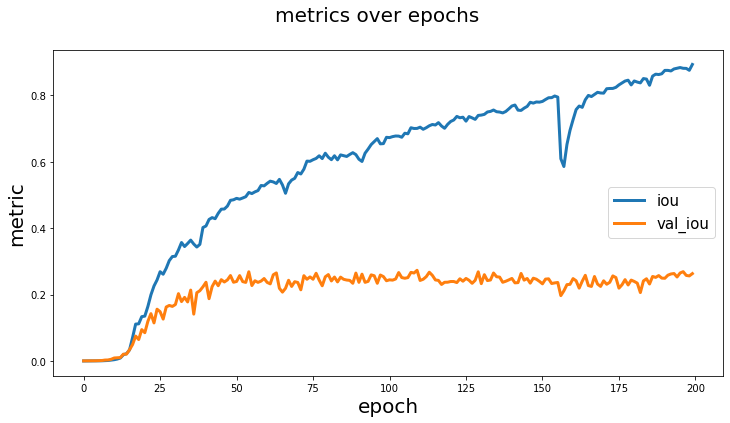

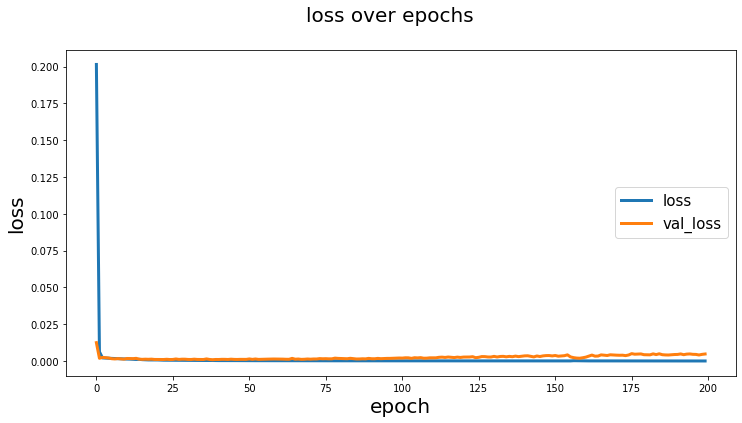

In [16]:
C.Helper.visualize_graph(history)

In [17]:
y_pred = C.Helper.prediction(X_test, model)

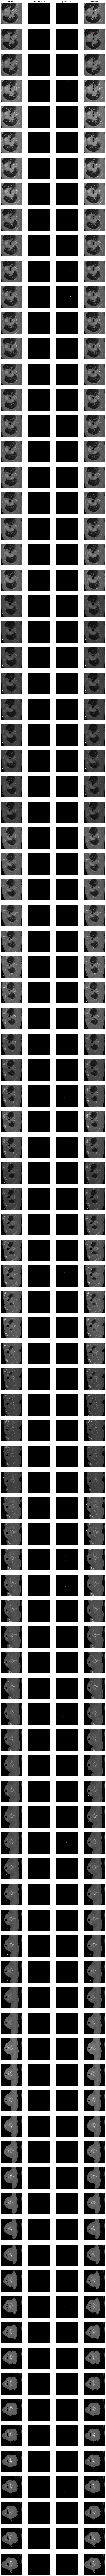

In [18]:
C.Helper.visualize_result(X_test, y_test, y_pred)

In [19]:
C.Helper.evaluate(X_test, y_test, model)

102/102 [==============================] - 23s 223ms/step - loss: 4.5175e-04 - iou: 0.0676 - iou_thresholded: 0.0916
